# MaxAbsScaler

- Not so useful when feature has outliers.
- For each feature X, we calculate the max value (Xmax) (in absolute terms)
- For each value in that feature X (Xi), calculate:
- New Xi = "Xi" /("absolute X" 𝑚𝑎𝑥)


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MaxAbsScaler

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline

In [3]:
from sklearn.datasets import fetch_california_housing

In [4]:
X, y = fetch_california_housing(return_X_y=True, as_frame=True)

In [5]:
def plots(df, var, t):
    plt.figure(figsize=(13,5))
    plt.subplot(121)
    sns.kdeplot(df[var])
    plt.title('before ' + str(t).split('(')[0])
    
    plt.subplot(122)
    p1 = t.fit_transform(df[[var]]).flatten()
    sns.kdeplot(p1)
    plt.title('after ' + str(t).split('(')[0])

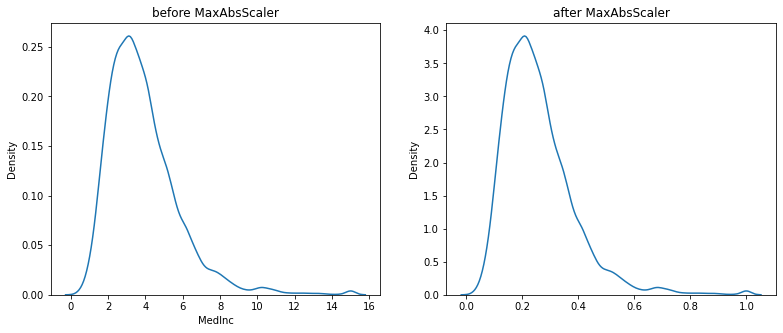

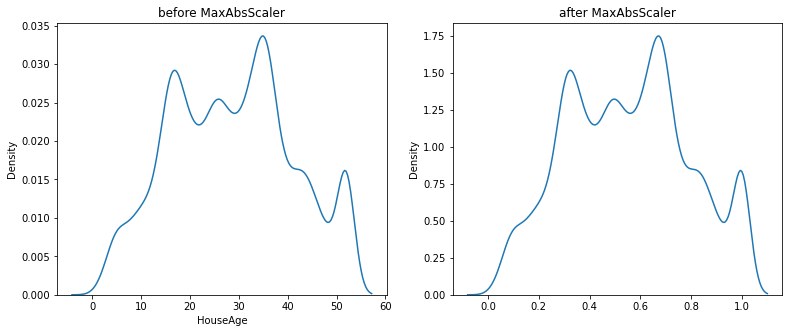

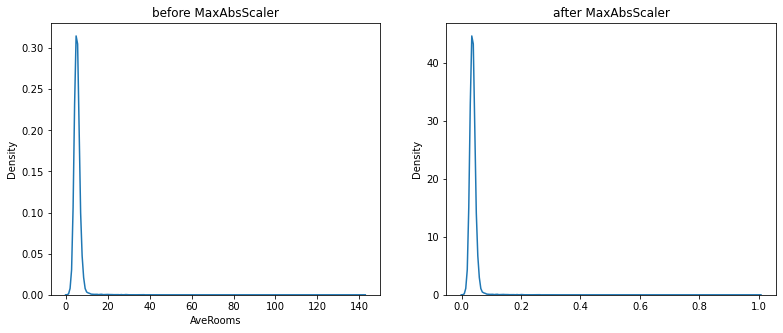

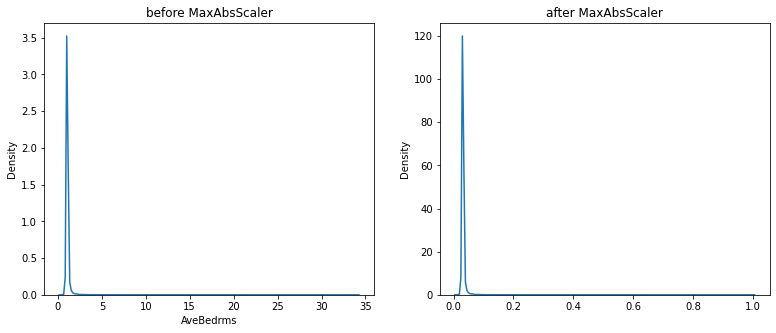

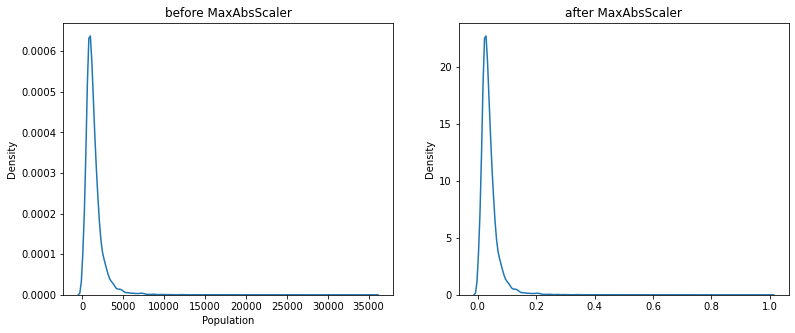

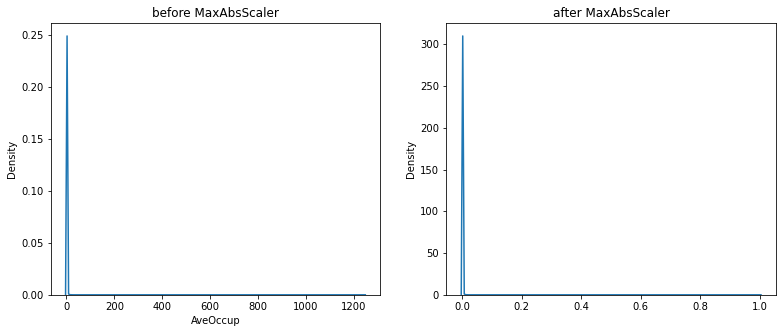

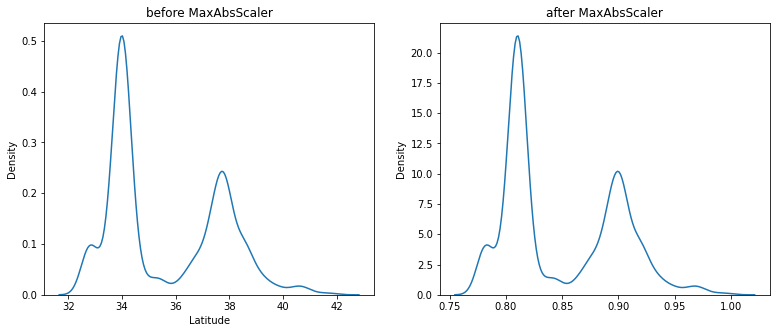

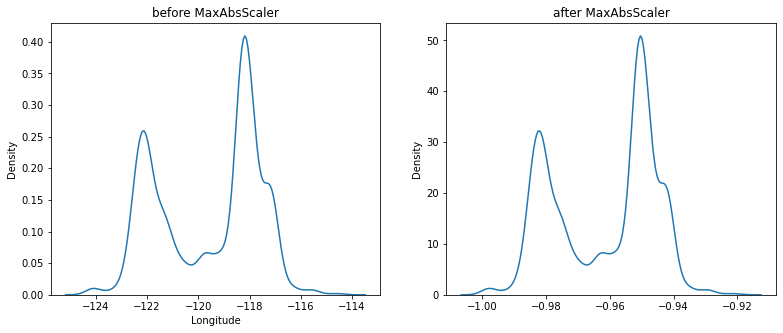

In [6]:
for col in X.columns:
    plots(X, col, MaxAbsScaler())

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2, random_state=0)

In [8]:
def model_accuracy_scaled(mod):
    model_scaled = Pipeline([
        ('scale', MaxAbsScaler()),
        ('model', mod)
    ])
    model_scaled.fit(X_train, y_train)
    return model_scaled.score(X_test, y_test)

def model_accuracy_unscaled(mod):
    model_unscaled = Pipeline([
        ('model', mod)
    ])
    model_unscaled.fit(X_train, y_train)
    return model_unscaled.score(X_test, y_test)

In [9]:
model_accuracy_scaled(KNeighborsRegressor())

0.5566896195690834

In [10]:
model_accuracy_unscaled(KNeighborsRegressor())

0.14312051440566032

In [11]:
model_accuracy_scaled(RandomForestRegressor(random_state=0))

0.7987749878347591

In [12]:
model_accuracy_unscaled(RandomForestRegressor(random_state=0))

0.7986931773699132